In [1]:
import pandas as pd

# Read data
train = pd.read_csv('dengue_features_train.csv')
test = pd.read_csv('dengue_features_test.csv')
labels = pd.read_csv('dengue_labels_train.csv')

# Cleaning

In [2]:
# Convert week_start_date to datetime object
train['week_start_date'] = pd.to_datetime(train['week_start_date'])

In [3]:
# Putting week_start_date to become index
train.index = train['week_start_date']

In [4]:
# Splitting cities
train_sj = train[train['city'] == 'sj'].copy()
train_iq = train[train['city'] == 'iq'].copy()

In [5]:
# Merging train and labels data
train_sj = train_sj.merge(labels, on=['city', 'year', 'weekofyear'])

In [6]:
# Setting datetime index
train_sj.index = train_sj['week_start_date']

# *Imputing Nans*

In [7]:
# Only columns with missing values
nans_columns = train_sj.columns[4:]

In [8]:
# Imputing with linear interpolation
linear_sj = train_sj[nans_columns].interpolate(method='linear')

In [9]:
linear_sj

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1


# *Finding pattern on target value outliers*
# *Difference between rest of the data with high values and low values*

To understand the data better and explore the model further, I did the following.

In [10]:
target = 'total_cases'

data_high_value = linear_sj.loc[linear_sj[target] > 300]
data_low_value = linear_sj.loc[linear_sj[target] < 100]
# Lower than 100 = 880 rows
# Higher 300 100 = 11 rows

[Text(1, 0, 'ndvi_ne'),
 Text(2, 0, 'ndvi_nw'),
 Text(3, 0, 'ndvi_se'),
 Text(4, 0, 'ndvi_sw'),
 Text(5, 0, 'precipitation_amt_mm'),
 Text(6, 0, 'reanalysis_air_temp_k'),
 Text(7, 0, 'reanalysis_avg_temp_k'),
 Text(8, 0, 'reanalysis_dew_point_temp_k'),
 Text(9, 0, 'reanalysis_max_air_temp_k'),
 Text(10, 0, 'reanalysis_min_air_temp_k'),
 Text(11, 0, 'reanalysis_precip_amt_kg_per_m2'),
 Text(12, 0, 'reanalysis_relative_humidity_percent'),
 Text(13, 0, 'reanalysis_sat_precip_amt_mm'),
 Text(14, 0, 'reanalysis_specific_humidity_g_per_kg'),
 Text(15, 0, 'reanalysis_tdtr_k'),
 Text(16, 0, 'station_avg_temp_c'),
 Text(17, 0, 'station_diur_temp_rng_c'),
 Text(18, 0, 'station_max_temp_c'),
 Text(19, 0, 'station_min_temp_c'),
 Text(20, 0, 'station_precip_mm'),
 Text(21, 0, 'total_cases')]

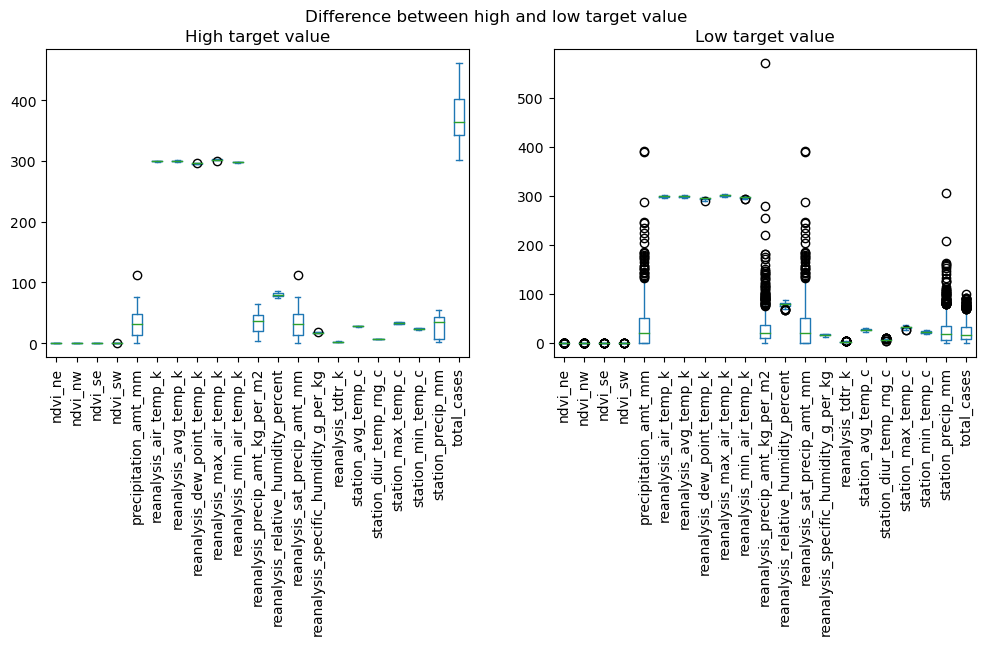

In [11]:
import matplotlib.pyplot as plt

# Plotting the difference between high and low target value
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax = ax.flatten()
plt.suptitle('Difference between high and low target value')

# First subplot (high value)
data_high_value.plot(kind='box', ax=ax[0])
ax[0].set_title('High target value')
ax[0].set_xticklabels(labels=data_high_value, rotation=90)

# Second subplot (low value)
data_low_value.plot(kind='box', ax=ax[1])
ax[1].set_title('Low target value')
ax[1].set_xticklabels(labels=data_low_value, rotation=90)

In [12]:
data_high_value.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.117394,0.063002,0.142724,0.189884,36.937273,299.718961,299.807143,295.962597,302.154545,297.936364,...,80.080130,36.937273,17.398701,2.388312,28.067532,7.002597,33.281818,23.609091,28.836364,373.909091
std,0.046138,0.005882,0.025429,0.012343,33.127294,0.552690,0.625316,0.496416,0.769888,0.492489,...,3.306178,33.127294,0.529888,0.448481,0.487354,0.511493,1.199848,0.832412,19.724516,46.599259
min,0.028667,0.054758,0.103484,0.152686,0.630000,298.811429,298.857143,295.362857,300.500000,297.200000,...,74.117143,0.630000,16.744286,1.657143,27.285714,6.185714,31.700000,22.200000,1.900000,302.000000
25%,0.089152,0.058143,0.123443,0.193234,13.930000,299.360000,299.378571,295.632857,301.850000,297.550000,...,78.455714,13.930000,17.054286,2.107143,27.764286,6.771429,32.200000,23.300000,7.200000,343.000000
50%,0.120081,0.062564,0.143402,0.193543,32.170000,299.638571,299.642857,295.845714,302.200000,297.800000,...,80.095714,32.170000,17.264286,2.400000,28.157143,6.928571,32.800000,23.900000,34.300000,364.000000
75%,0.151011,0.067443,0.163362,0.193851,47.550000,300.062143,300.225000,296.172857,302.700000,298.300000,...,82.360000,47.550000,17.642857,2.678571,28.414286,7.378571,34.150000,24.400000,43.350000,402.500000
max,0.181941,0.072322,0.175857,0.194160,111.520000,300.662857,300.885714,297.127143,303.200000,298.700000,...,85.417143,111.520000,18.631429,3.028571,28.714286,7.657143,35.000000,24.400000,54.500000,461.000000


In [13]:
data_low_value.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,...,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,0.057075,0.065768,0.177781,0.165763,34.697256,299.105238,299.220211,295.039545,301.334716,297.243864,...,78.504117,34.697256,16.481528,2.511250,26.936705,6.748312,31.531420,22.536250,26.560455,23.960227
std,0.104016,0.093375,0.057427,0.056750,44.450079,1.232464,1.215573,1.579577,1.248342,1.298981,...,3.397984,44.450079,1.567499,0.494656,1.419541,0.846539,1.725374,1.508414,29.283481,20.372348
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,292.600000,...,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,0.002325,0.014395,0.139356,0.128141,0.000000,298.120000,298.241071,293.749643,300.400000,296.300000,...,76.168214,0.000000,15.160357,2.157143,25.739286,6.185714,30.450000,21.100000,6.600000,8.750000
50%,0.057879,0.065950,0.177207,0.165804,20.035000,299.185000,299.307143,295.366429,301.400000,297.500000,...,78.632857,20.035000,16.753571,2.442857,27.121429,6.757143,31.700000,22.800000,17.550000,17.000000
75%,0.110925,0.114325,0.212661,0.203439,51.322500,300.092143,300.200000,296.397857,302.300000,298.300000,...,80.908929,51.322500,17.829643,2.785714,28.128571,7.285714,32.800000,23.900000,35.150000,33.000000
max,0.493400,0.437100,0.393129,0.381420,390.600000,301.495714,301.692857,297.598571,304.300000,299.600000,...,87.575714,390.600000,19.207143,4.357143,30.071429,9.914286,35.600000,25.600000,305.900000,99.000000


- There are a lot of outliers in low target value

- ndvi's and reanalysis-k's are same
- precipitation_amt_mm is different (for low max is 390, which might also be an outlier, and for high max is 111)
by the look at the boxplots, we see there are many outliers in low target value
- reanalysis_precip_amt_kg_per_m2 (there is a huge outlier in low target value)
- reanalysis_relative_humidity_percent (higher min and max values compared to high target value)
- reanalysis_sat_precip_amt_mm (higher values in low target)
- next 6 values are more-or-less the same
- station_precip_mm is same, but low target has outliers

- To conclude, for the low target value there are a lot of outliers (low target values have high values compared to high target)

Further things to be done to understand the data better:
- Difference in values between sj and iq city
- Difference between high and low target values for iq city
- Comparing the results
- More exploratory analysis